In [8]:
import tensorflow as tf
import pennylane as qml
import keras
tf.keras.backend.set_floatx('float64')

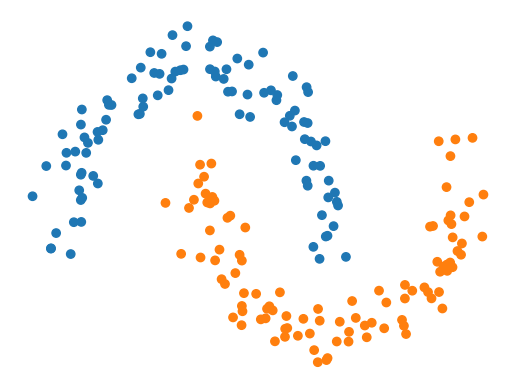

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

X, y = make_moons(n_samples=200, noise=0.1)
y_hot = tf.keras.utils.to_categorical(y, num_classes=2)  # one-hot encoded labels

c = ["#1f77b4" if y_ == 0 else "#ff7f0e" for y_ in y]  # colours for each class
plt.axis("off")
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.show()

In [10]:

n_qubits = 2
dev = qml.device("lightning.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

In [11]:
n_layers = 6
weight_shapes = {"weights": (n_layers, n_qubits)}
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)


In [12]:
clayer_1 = tf.keras.layers.Dense(2)
clayer_2 = tf.keras.layers.Dense(2, activation="softmax")
model = tf.keras.models.Sequential([clayer_1, qlayer, clayer_2])

In [13]:
opt = tf.keras.optimizers.SGD(learning_rate=0.2)
model.compile(opt, loss="mae", metrics=["accuracy"])

In [14]:
fitting = model.fit(X, y_hot, epochs=6, batch_size=5, validation_split=0.25, verbose=2)


Epoch 1/6
30/30 - 1s - loss: 0.3016 - accuracy: 0.7933 - val_loss: 0.2407 - val_accuracy: 0.8200 - 1s/epoch - 38ms/step
Epoch 2/6
30/30 - 1s - loss: 0.2309 - accuracy: 0.8400 - val_loss: 0.2062 - val_accuracy: 0.8400 - 957ms/epoch - 32ms/step
Epoch 3/6
30/30 - 1s - loss: 0.1888 - accuracy: 0.8533 - val_loss: 0.1897 - val_accuracy: 0.8200 - 919ms/epoch - 31ms/step
Epoch 4/6
30/30 - 1s - loss: 0.1704 - accuracy: 0.8600 - val_loss: 0.1763 - val_accuracy: 0.8600 - 929ms/epoch - 31ms/step
Epoch 5/6
30/30 - 1s - loss: 0.1620 - accuracy: 0.8667 - val_loss: 0.1718 - val_accuracy: 0.8600 - 901ms/epoch - 30ms/step
Epoch 6/6
30/30 - 1s - loss: 0.1494 - accuracy: 0.8667 - val_loss: 0.1995 - val_accuracy: 0.8400 - 913ms/epoch - 30ms/step
